In [2]:
!pip install pyforest

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15928 sha256=bdd348bdb81ce8a365232b7ad9a74737d2f25929500bb67de3a74d54106bda4c
  Stored in directory: c:\users\madhu\appdata\local\pip\cache\wheels\66\4f\3c\cbdf5336b5a84f39cb6e3d76eecb9acf3f99a2c072785afecc
Successfully built pyforest


In [3]:
#import all packages
import pyforest

In [4]:
data = pd.read_csv('titanic.csv')
data

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#checking how many rows and columns
data.shape

(891, 12)

In [7]:
#checking how many null values present dataset
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#check information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#check datatypes
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#import label encoder
from sklearn import preprocessing 

#label_encoder object knows to understand word labels
label_encoder = preprocessing.LabelEncoder()

#encode labels in column 'Gender'
data['Sex'] = label_encoder.fit_transform(data['Sex'])

#converting male as 1 and female as 2
data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [14]:
#droping the unwanted columns
data = data.drop(['Ticket', 'Cabin', 'Name'], axis = 1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,NaN,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [15]:
#finding median of age column
data['Age'].median()

28.0

In [16]:
#filling the null values using fillna
data['Age'] = data['Age'].fillna(value = 28)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,28.0,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [17]:
data['Age'].isna().sum()

0

In [18]:
#import pandas_profiling
#data.profile_report()
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [19]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
g = data.groupby('Survived')
g['Embarked'].value_counts() #groupby multiple columns

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [23]:
data['Embarked'] = data['Embarked'].fillna(value='5')
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,28.0,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [24]:
#import label encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

#encode labels in column 'Gender'
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
data['Embarked'].value_counts()

Embarked
3    644
1    168
2     77
0      2
Name: count, dtype: int64

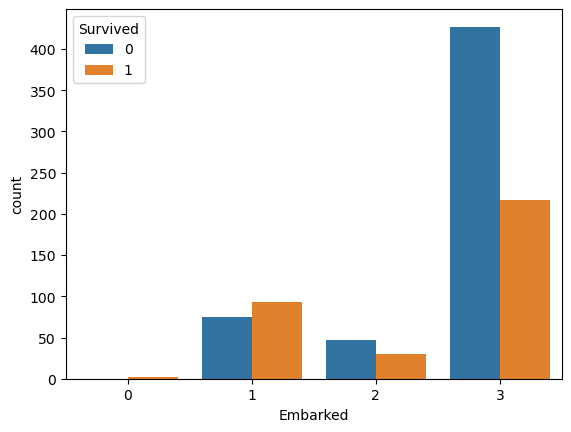

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Embarked', hue='Survived', data=data)
plt.show()

In [30]:
data['Embarked'].value_counts()

Embarked
3    644
1    168
2     77
0      2
Name: count, dtype: int64

In [31]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,3
887,888,1,1,0,19.0,0,0,30.0000,3
888,889,0,3,0,28.0,1,2,23.4500,3
889,890,1,1,1,26.0,0,0,30.0000,1


In [32]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.173511
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.118492
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031903
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.071480
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.043351
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.230365
Embarked,0.012985,-0.176509,0.173511,0.118492,-0.031903,0.071480,0.043351,-0.230365,1.000000


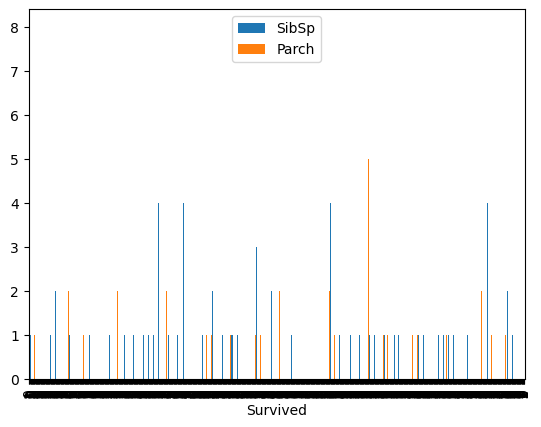

In [33]:
data.plot(x="Survived", y=['SibSp', 'Parch'],kind="bar")
plt.show()

In [35]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
print(corr_matrix)

# Sort the correlation values with respect to the 'Survived' column
survived_corr = corr_matrix['Survived'].sort_values(ascending=False)
print(survived_corr)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.339898  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.081163 -0.114631   
Age             0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096688  0.159651   
Embarked        0.012985 -0.176509  0.173511  0.118492 -0.031903  0.071480   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.012985  
Survived     0.081629  0.257307 -0.176509  
Pclass       0.018443 -0.549500  0.173511  
Sex         -0.245489 -0.182333  0.118492  

<Axes: >

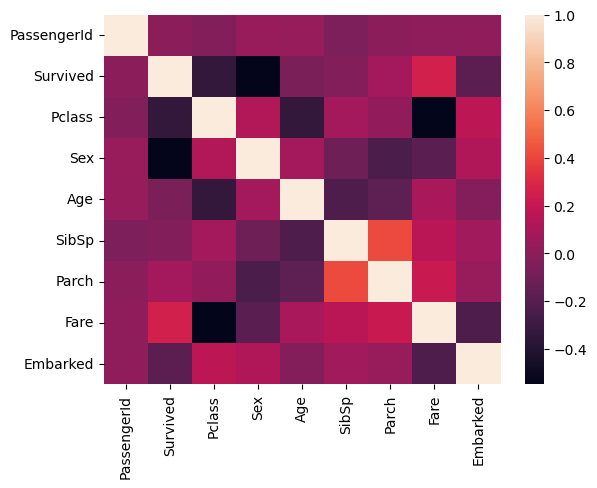

In [36]:
sns.heatmap(data.corr())

In [38]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
print(corr_matrix)

# Sort and display the correlation values with respect to the 'Fare' column
fare_corr = corr_matrix['Fare'].sort_values(ascending=False)
print(fare_corr)

# Display the correlation values for the 'Fare' column
print(corr_matrix['Fare'])

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.339898  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.081163 -0.114631   
Age             0.034212 -0.064910 -0.339898  0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096688  0.159651   
Embarked        0.012985 -0.176509  0.173511  0.118492 -0.031903  0.071480   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.012985  
Survived     0.081629  0.257307 -0.176509  
Pclass       0.018443 -0.549500  0.173511  
Sex         -0.245489 -0.182333  0.118492  

In [39]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


In [40]:
data['family'] = data['SibSp']+data['Parch']+1
data = data.drop(['SibSp', 'Parch'], axis = 1)
data = data.drop('PassengerId', axis = 1)
data = data.drop('Embarked', axis = 1)
data

,Survived,Pclass,Sex,Age,Fare,family
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,2
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1
887,1,1,0,19.0,30.0000,1
888,0,3,0,28.0,23.4500,4
889,1,1,1,26.0,30.0000,1


In [41]:
x = data.drop('Survived', axis = 1).values
y = data['Survived'].values

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
lr = LogisticRegression()
lr.fit(x_train, y_train) #sending data to train 70%
lrpred = lr.predict(x_test)

In [47]:
accuracy_score(y_test, lrpred)

0.7910447761194029

In [49]:
#optimization technique
from sklearn.model_selection import GridSearchCV

#creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C' : c_space}

#instantiating the GridSearchCV object
logreg_cv = GridSearchCV(lr, param_grid, cv=5)
logreg_cv.fit(x_train, y_train)

#print the tuned paramters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Besst Score is {}".format(logreg_cv.best_score_))

<IPython.core.display.Javascript object>

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Besst Score is 0.8042193548387097
